In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn as sl
import scipy.stats as ss
import logging
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from pandas import DataFrame, Series

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [80]:
class RJH(object):

    def __init__(self, table):
        """
        init prams
        """
        self.__htArray = table
        self.__table = table
        self.preprocess()
        #print self.__table
        self.name = "hetong rijihua"

    def getWholeTable(self):

        """fetch the whole table!"""
        return self.__htArray
    
    def getTable(self):
        """fetch the preprocessed table"""
        return self.__table

    def getColumn(self, columnName=None, columnNumber=None):
        """fetch one column of the table either by Name for ny column index"""
        data = self.getTable()
        if columnName and columnNumber:
            print "Only one prameter needed!!!"
            raise ValueError
        elif columnName:
            return data[columnName]
        elif columnNumber:
            return data.values[:,columnNumber-1]
        else:
            print "You should give either the columnName or the columnNumber!!!"
            raise IOError


    def processWithNull(self):
        data = self.getTable()
        inputs = preprocessing.Imputer(missing_values='NaN', strategy='mean', axis=0)
        new_data = inputs.fit(data)
        return new_data

    def preprocess(self):
        data = self.getWholeTable()
        data["month"] = pd.Series(["0"+x if int(x)<10 and len(x)<2 else x for x in data["month"]])
        data["day"] = pd.Series(["0"+x if int(x)<10 and len(x)<2 else x for x in data["day"]])
        data["time"] = data["year"] + data["month"] + data["day"]
        self.__data = data
        

    def getWeightMean(self, arr, weights=None):
        if not weights:
            return arr.sum()/len(arr)
        else:
            return np.mean(arr, weights)

    def funargs(argType="day"):
        def meanWrapper(func):
            def inner():
                self.func()
                return inner
        return meanWrapper
    
    def getmean(self):
        pass
        
    def getCompanyInfo(self, companyId):
       
        """
         params:
                 companyId: int, the id number of client;
        """
        data = self.getTable()
        
        companyInfo = data.values[data.values[:,4]==companyId]
        #print companyInfo
        return DataFrame(companyInfo, columns=data.columns)

    def getMeanByDay(self, date=None):
        data = self.getTable()
        dayData = data.values[data.values[:,5] == date]
        return np.mean(dayData[:,3])

    def getMeanByCompany(self, companyId=None, companyName=None):
        data = self.getTable()
        values = data.values
        
        if  companyId:
            companyData = values[values[:,4] == companyId]
            return np.mean(companyData[:,3])
        
        elif companyName:
            companyData = values[values[:,7] == companyName]
            return np.mean(companyData[:,3])
        

    def getMedianByDay(self,date=None):
        data = self.getTable()
        dayData = data.values[data.values[:,5] == date]
        return np.median(dayData[:,3])
    

    def getMedianByCompany(self, companyId=None, companyName=None):
        
        data = self.getTable()
        values = data.values
        
        if companyId:
            companyData = values[values[:,4] == companyId]
            return np.median(companyData[:,3])
        elif CompanyName:
            companyData = values[values[:,7] == companyName]
            return np.median(companyData[:,3])
        
    def getConsumptionByDay(self, date=None):
        data = self.getTable()
        dayData = data.values[data.values[:,5] == date]
        return np.sum(dayData[:,3])

    def getConsumptionByCompany(self, companyId=None, companyName=None):
        data = self.getTable()
        values = data.values
        
        if  companyId:
            companyData = values[values[:,4] == companyId]
            return np.sum(companyData[:,3])
        
        elif companyName:
            companyData = values[values[:,7] == companyName]
            return np.sum(companyData[:,3])    
    
    def getVariance(self, date=None):
        data = self.getTable()
        dayData = data.values[data.values[:,5] == date]
        return np.std(dayData[:,3])                     
        

    def predict(self):

        pass


In [9]:
######get the filename######
filename = 'rjhb3000.csv'
    #print filename

###################################################################################
######read file into dataFrame#######
data = pd.read_csv(filename, sep='\t',
                        header=0, dtype={"year":str, "month":str, "day":str})
    #print(data)

##################################################################################
######Function Test######
######preprocess######



In [81]:
rjh = RJH(data)
#print rjh.name
print rjh.getTable()
print rjh.getCompanyInfo(3000338)
print "day mean: " ,rjh.getMeanByDay('20180831')
print "company mean: ",rjh.getMeanByCompany(3000339)
print "day median: ", rjh.getMedianByDay('20180831')
print "company median: ",rjh.getMedianByCompany(3000339)
print "day consumption: " ,rjh.getConsumptionByDay('20180831')
print "company consumtion: ",rjh.getConsumptionByCompany(3000339)
print "the 4th colume: ", rjh.getColumn(columnNumber = 4)
print "the variance of 2018.08.31 is :", rjh.getVariance('20180831')


      year month day   volume  company      time
0     2018    08  29   0.0000  3000336  20180829
1     2018    08  29   0.6452  3000337  20180829
2     2018    08  29   6.8387  3000338  20180829
3     2018    08  29   3.2470  3000339  20180829
4     2018    08  29   1.6083  3000340  20180829
5     2018    08  29   0.0000  3000341  20180829
6     2018    08  29   0.0000  3000342  20180829
7     2018    08  29   0.0000  3000344  20180829
8     2018    08  29   0.0000  3000345  20180829
9     2018    08  29   0.0000  3000347  20180829
10    2018    08  29  18.0000  3000350  20180829
11    2018    08  29   8.0000  3000351  20180829
12    2018    08  29   0.3500  3000352  20180829
13    2018    08  29   0.2903  3000353  20180829
14    2018    08  29   0.3226  3000354  20180829
15    2018    08  29   3.8710  3000355  20180829
16    2018    08  29   0.5806  3000356  20180829
17    2018    08  29   0.5806  3000357  20180829
18    2018    08  29  18.2581  3000358  20180829
19    2018    08  29

In [17]:
Pdata = rjh.getTable()
#print Pdata
dayData = data.values[data.values[:,5] == '201800830']
print dayData
mu, median, var , maxV, minV = np.mean(dayData[:,3]), np.median(dayData[:,3]), np.std(dayData[:,3]), np.max(dayData[:,3]), np.min(dayData[:,3])
print mu,median, var, maxV, minV

[['2018' '008' '30' 152.5161 1 '201800830']
 ['2018' '008' '30' 0.0 3 '201800830']
 ['2018' '008' '30' 82.0 4 '201800830']
 ..., 
 ['2018' '008' '30' 10.5 8200024 '201800830']
 ['2018' '008' '30' 0.0 8200025 '201800830']
 ['2018' '008' '30' 0.6452 8200026 '201800830']]
6.69418862919 0.78755 22.1526067692 283.1052 0.0


[1, 2, 3] [14.0 14.0 14.0]


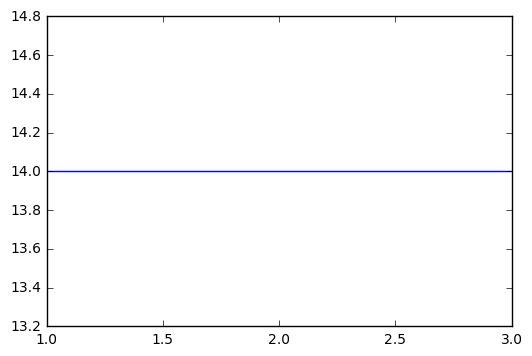

In [79]:
ci = rjh.getCompanyInfo(8000032)
y = ci.values[:,3]
x = ci.values[:,5]
x = [1,2,3]
print x, y
plt.plot(x, y)
plt.show()